<a href="https://colab.research.google.com/github/Khajauli/AI/blob/main/BMW_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
'''seaborn es usado para graficar'''
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#para metricas de evaluacion
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.optimizers import SGD
from tensorflow import keras

#label encoder
from sklearn.preprocessing import LabelEncoder

# Lectura de archivos y variables

In [2]:
dataframe = pd.read_csv('bmw_pricing_challenge.csv')

In [3]:
dataframe

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


# Análisis

Sacar la columna master_key

In [4]:
dataframe=dataframe.drop('maker_key',axis=1)

In [5]:
dataframe

,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


Sacar los años de las columnas de fechas para poder calcular los años de permanencia

In [6]:
dataframe['registration_date'] = pd.to_datetime(dataframe['registration_date'])
dataframe['registration_year']=dataframe['registration_date'].apply(lambda date:date.year)
dataframe=dataframe.drop('registration_date',axis=1)

In [7]:
dataframe['sold_at'] = pd.to_datetime(dataframe['sold_at'])
dataframe['sold_year']=dataframe['sold_at'].apply(lambda date:date.year)
dataframe=dataframe.drop('sold_at',axis=1)

In [8]:
dataframe

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,registration_year,sold_year
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2012,2018
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2016,2018
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2012,2018
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2014,2018
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2014,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,diesel,black,van,False,True,False,False,False,False,True,False,14600,2015,2018
4839,218 Active Tourer,49832,100,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2015,2018
4840,218 Gran Tourer,19633,110,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2015,2018
4841,218 Active Tourer,27920,110,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2016,2018


In [9]:
dataframe['permanencia']=dataframe['sold_year']-dataframe['registration_year']

In [10]:
dataframe

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,registration_year,sold_year,permanencia
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2012,2018,6
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2016,2018,2
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2012,2018,6
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2014,2018,4
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2014,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,diesel,black,van,False,True,False,False,False,False,True,False,14600,2015,2018,3
4839,218 Active Tourer,49832,100,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2015,2018,3
4840,218 Gran Tourer,19633,110,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2015,2018,3
4841,218 Active Tourer,27920,110,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2016,2018,2


In [11]:
dataframe.describe()

,mileage,engine_power,price,registration_year,sold_year,permanencia
count,4.843000e+03,4843.00000,4843.000000,4843.000000,4843.0,4843.000000
mean,1.409628e+05,128.98823,15828.081767,2012.467479,2018.0,5.532521
std,6.019674e+04,38.99336,9220.285684,2.526997,0.0,2.526997
min,-6.400000e+01,0.00000,100.000000,1990.000000,2018.0,1.000000
25%,1.029135e+05,100.00000,10800.000000,2012.000000,2018.0,4.000000
50%,1.410800e+05,120.00000,14200.000000,2013.000000,2018.0,5.000000
75%,1.751955e+05,135.00000,18600.000000,2014.000000,2018.0,6.000000
max,1.000376e+06,423.00000,178500.000000,2017.000000,2018.0,28.000000


Pasar de caracteristicas a numeros

In [12]:
#prueba en fuel
encoder = LabelEncoder()
dataframe["fuel"] = encoder.fit_transform(dataframe["fuel"])

In [13]:
dataframe

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,registration_year,sold_year,permanencia
0,118,140411,100,0,black,convertible,True,True,False,False,True,True,True,False,11300,2012,2018,6
1,M4,13929,317,3,grey,convertible,True,True,False,False,False,True,True,True,69700,2016,2018,2
2,320,183297,120,0,white,convertible,False,False,False,False,True,False,True,False,10200,2012,2018,6
3,420,128035,135,0,red,convertible,True,True,False,False,True,True,True,True,25100,2014,2018,4
4,425,97097,160,0,silver,convertible,True,True,False,False,False,True,True,True,33400,2014,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743,110,0,black,van,False,True,False,False,False,False,True,False,14600,2015,2018,3
4839,218 Active Tourer,49832,100,0,grey,van,False,True,False,False,False,False,True,True,17500,2015,2018,3
4840,218 Gran Tourer,19633,110,0,grey,van,False,True,False,False,False,False,True,True,17000,2015,2018,3
4841,218 Active Tourer,27920,110,0,brown,van,True,True,False,False,False,False,True,True,22700,2016,2018,2


In [14]:
dataframe["paint_color"] = encoder.fit_transform(dataframe["paint_color"])
dataframe["car_type"] = encoder.fit_transform(dataframe["car_type"])
dataframe["feature_1"] = encoder.fit_transform(dataframe["feature_1"])
dataframe["feature_2"] = encoder.fit_transform(dataframe["feature_2"])
dataframe["feature_3"] = encoder.fit_transform(dataframe["feature_3"])
dataframe["feature_4"] = encoder.fit_transform(dataframe["feature_4"])
dataframe["feature_5"] = encoder.fit_transform(dataframe["feature_5"])
dataframe["feature_6"] = encoder.fit_transform(dataframe["feature_6"])
dataframe["feature_7"] = encoder.fit_transform(dataframe["feature_7"])
dataframe["feature_8"] = encoder.fit_transform(dataframe["feature_8"])

In [15]:
dataframe["model_key"] = encoder.fit_transform(dataframe["model_key"])

In [16]:
dataframe

,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,registration_year,sold_year,permanencia
0,2,140411,100,0,1,0,1,1,0,0,1,1,1,0,11300,2012,2018,6
1,61,13929,317,3,5,0,1,1,0,0,0,1,1,1,69700,2016,2018,2
2,21,183297,120,0,9,0,0,0,0,0,1,0,1,0,10200,2012,2018,6
3,31,128035,135,0,7,0,1,1,0,0,1,1,1,1,25100,2014,2018,4
4,33,97097,160,0,8,0,1,1,0,0,0,1,1,1,33400,2014,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,0,1,7,0,1,0,0,0,0,1,0,14600,2015,2018,3
4839,12,49832,100,0,5,7,0,1,0,0,0,0,1,1,17500,2015,2018,3
4840,13,19633,110,0,5,7,0,1,0,0,0,0,1,1,17000,2015,2018,3
4841,12,27920,110,0,3,7,1,1,0,0,0,0,1,1,22700,2016,2018,2


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   model_key          4843 non-null   int64
 1   mileage            4843 non-null   int64
 2   engine_power       4843 non-null   int64
 3   fuel               4843 non-null   int64
 4   paint_color        4843 non-null   int64
 5   car_type           4843 non-null   int64
 6   feature_1          4843 non-null   int64
 7   feature_2          4843 non-null   int64
 8   feature_3          4843 non-null   int64
 9   feature_4          4843 non-null   int64
 10  feature_5          4843 non-null   int64
 11  feature_6          4843 non-null   int64
 12  feature_7          4843 non-null   int64
 13  feature_8          4843 non-null   int64
 14  price              4843 non-null   int64
 15  registration_year  4843 non-null   int64
 16  sold_year          4843 non-null   int64
 17  permanencia   

# Pearson

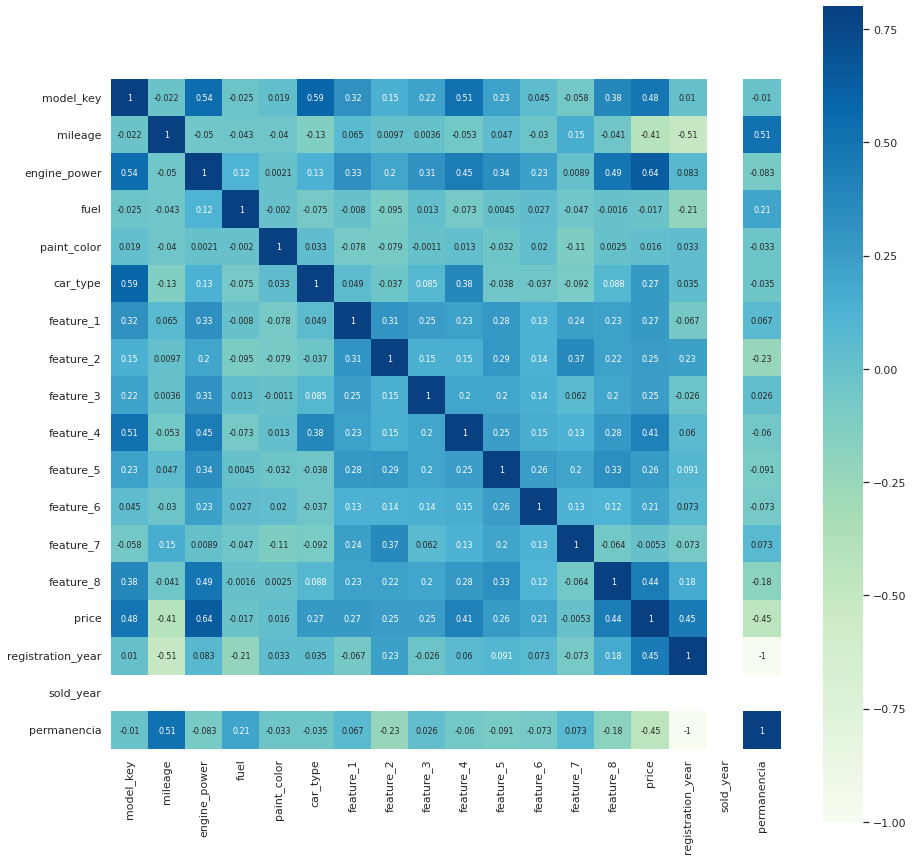

In [18]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

Después del análisis se eliminan las variables

In [19]:
dataframe=dataframe.drop('fuel',axis=1)
dataframe=dataframe.drop('paint_color',axis=1)
dataframe=dataframe.drop('feature_7',axis=1)
dataframe=dataframe.drop('sold_year',axis=1)
dataframe

,model_key,mileage,engine_power,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,price,registration_year,permanencia
0,2,140411,100,0,1,1,0,0,1,1,0,11300,2012,6
1,61,13929,317,0,1,1,0,0,0,1,1,69700,2016,2
2,21,183297,120,0,0,0,0,0,1,0,0,10200,2012,6
3,31,128035,135,0,1,1,0,0,1,1,1,25100,2014,4
4,33,97097,160,0,1,1,0,0,0,1,1,33400,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,7,0,1,0,0,0,0,0,14600,2015,3
4839,12,49832,100,7,0,1,0,0,0,0,1,17500,2015,3
4840,13,19633,110,7,0,1,0,0,0,0,1,17000,2015,3
4841,12,27920,110,7,1,1,0,0,0,0,1,22700,2016,2


# Limpieza

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37ecbcf9d0>,
      dtype=object)

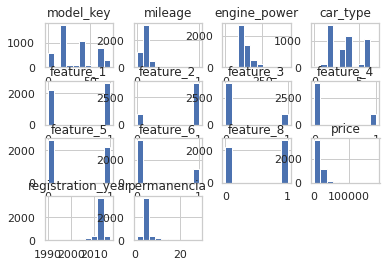

In [20]:
dataframe.hist()

Llenamos los null

In [21]:
dataframe=dataframe.fillna(dataframe.mean())
dataframe.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       model_key  mileage  engine_power  car_type  feature_1  feature_2  \
0         False    False         False     False      False      False   
1         False    False         False     False      False      False   
2         False    False         False     False      False      False   
3         False    False         False     False      False      False   
4         False    False         False     False      False      False   
...         ...      ...           ...       ...        ...        ...   
4838      False    False         False     False      False      False   
4839      False    False         False     False      False      False   
4840      False    False         False     False      False      False   
4841      False    False         False     False      False      False   
4842      False    False         False     False      False      False   

      feature_3  feature_4  feature_5  feature_6 

Se separan en x y y

In [22]:
X=dataframe.drop('price',axis=1)
y= dataframe['price']

In [23]:
X

,model_key,mileage,engine_power,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,registration_year,permanencia
0,2,140411,100,0,1,1,0,0,1,1,0,2012,6
1,61,13929,317,0,1,1,0,0,0,1,1,2016,2
2,21,183297,120,0,0,0,0,0,1,0,0,2012,6
3,31,128035,135,0,1,1,0,0,1,1,1,2014,4
4,33,97097,160,0,1,1,0,0,0,1,1,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,7,0,1,0,0,0,0,0,2015,3
4839,12,49832,100,7,0,1,0,0,0,0,1,2015,3
4840,13,19633,110,7,0,1,0,0,0,0,1,2015,3
4841,12,27920,110,7,1,1,0,0,0,0,1,2016,2


In [24]:
y

0       11300
1       69700
2       10200
3       25100
4       33400
        ...  
4838    14600
4839    17500
4840    17000
4841    22700
4842    15500
Name: price, Length: 4843, dtype: int64

In [25]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(X)
X=minmaxscaler.transform(X)

In [26]:
X

array([[0.02702703, 0.14041322, 0.23640662, ..., 0.        , 0.81481481,
        0.18518519],
       [0.82432432, 0.01398685, 0.74940898, ..., 1.        , 0.96296296,
        0.03703704],
       [0.28378378, 0.18328036, 0.28368794, ..., 0.        , 0.81481481,
        0.18518519],
       ...,
       [0.17567568, 0.01968834, 0.26004728, ..., 1.        , 0.92592593,
        0.07407407],
       [0.16216216, 0.02797169, 0.26004728, ..., 1.        , 0.96296296,
        0.03703704],
       [0.56756757, 0.19581784, 0.37825059, ..., 1.        , 0.85185185,
        0.14814815]])

# Entrenamiento y testeo

In [27]:
X_train,X_test, y_train,y_test =train_test_split(X,y,random_state=50,test_size=0.30)

In [29]:
ann=Sequential()
ann.add(Dense(13,activation='relu'))
ann.add(Dense(7,activation='relu'))
ann.add(Dense(1,activation='relu'))
sgd=SGD(lr=0.02,momentum=0.7)
ann.compile(optimizer='adam',loss='mse')
ann.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=15,epochs=80,verbose=1)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


226/226 [==============================] - 2s 5ms/step - loss: 341831840.0000 - val_loss: 319248608.0000
Epoch 2/80
226/226 [==============================] - 1s 4ms/step - loss: 338680032.0000 - val_loss: 313117440.0000
Epoch 3/80
226/226 [==============================] - 1s 3ms/step - loss: 327780672.0000 - val_loss: 297596256.0000
Epoch 4/80
226/226 [==============================] - 1s 2ms/step - loss: 306074016.0000 - val_loss: 270894592.0000
Epoch 5/80
226/226 [==============================] - 1s 2ms/step - loss: 273300224.0000 - val_loss: 234302992.0000
Epoch 6/80
226/226 [==============================] - 0s 2ms/step - loss: 231824800.0000 - val_loss: 190936288.0000
Epoch 7/80
226/226 [==============================] - 1s 2ms/step - loss: 185154688.0000 - val_loss: 145277360.0000
Epoch 8/80
226/226 [==============================] - 1s 2ms/step - loss: 140646224.0000 - val_loss: 106104792.0000
Epoch 9/80
226/226 [==============================] - 1s 2ms/step - loss: 104977272

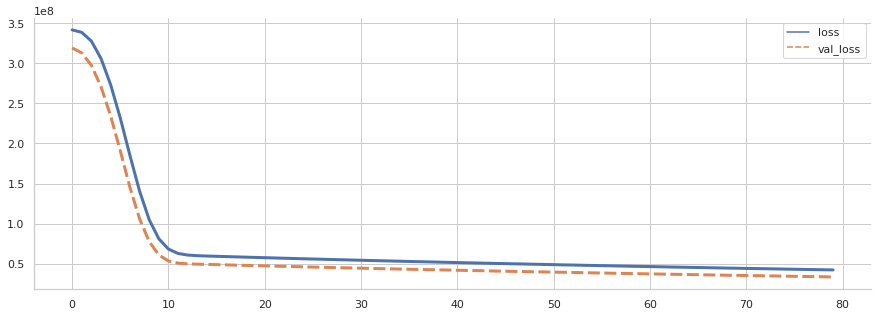

In [30]:
loss=pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Para encontrar el error absoluto

In [31]:
y_pred=ann.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

3656.276454749636


datos de la primera casa

In [33]:
carro0=dataframe.drop('price',axis=1).iloc[0]
print(carro0,'Precio: ',dataframe.iloc[0]['price'])

model_key                 2
mileage              140411
engine_power            100
car_type                  0
feature_1                 1
feature_2                 1
feature_3                 0
feature_4                 0
feature_5                 1
feature_6                 1
feature_8                 0
registration_year      2012
permanencia               6
Name: 0, dtype: int64 Precio:  11300


predicción del modelo

In [35]:
carro0=minmaxscaler.transform(carro0.values.reshape(-1,13))
ann.predict(carro0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[9687.879]], dtype=float32)

guardar el modelo

In [36]:
ann.save('BMW_Kharol_Chicaiza.h5')

In [38]:
modelann=Sequential()
modelann=Keras.load.load_model('BMW_Kharol_Chicaiza.h5')

NameError: ignored